3차원 데이터 준비

In [7]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

첫 번째 합성곱 층

In [8]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

두 번쨰 합성곱 층

In [9]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [10]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

모델 요약

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

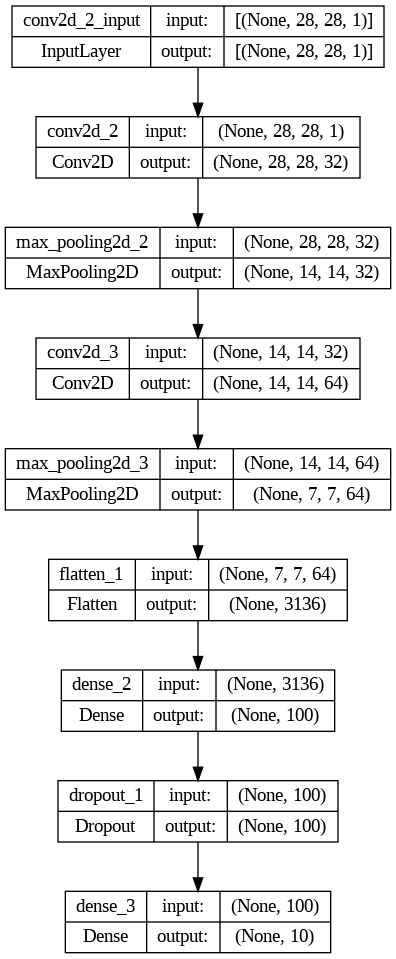

In [12]:
keras.utils.plot_model(model, show_shapes = True)

컴파일

In [13]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 12s 4ms/step - loss: 0.5208 - accuracy: 0.8111 - val_loss: 0.3296 - val_accuracy: 0.8791
Epoch 2/20
  32/1500 [..............................] - ETA: 4s - loss: 0.3186 - accuracy: 0.8809

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 5ms/step - loss: 0.3419 - accuracy: 0.8774 - val_loss: 0.2764 - val_accuracy: 0.8963
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2922 - accuracy: 0.8951 - val_loss: 0.2577 - val_accuracy: 0.9022
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2587 - accuracy: 0.9061 - val_loss: 0.2447 - val_accuracy: 0.9115
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2324 - accuracy: 0.9131 - val_loss: 0.2276 - val_accuracy: 0.9141
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2140 - accuracy: 0.9201 - val_loss: 0.2348 - val_accuracy: 0.9117
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1965 - accuracy: 0.9271 - val_loss: 0.2234 - val_accuracy: 0.9193
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1839 - accuracy: 0.9313 - val_loss: 0.2297 - val_accuracy: 0.9201
Epo

평가와 예측

In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2234 - accuracy: 0.9193


[0.2234485000371933, 0.9192500114440918]

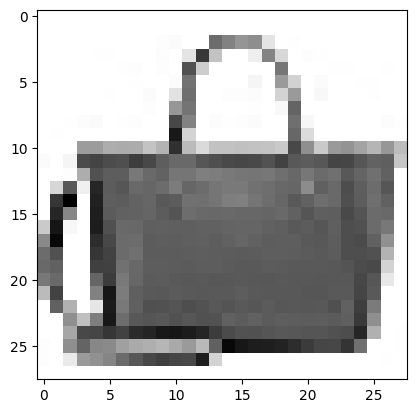

In [17]:
import matplotlib.pyplot as plt

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [18]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 204ms/step
[[1.5459742e-14 4.3223172e-21 4.0309107e-17 4.7490866e-16 9.1516303e-15
  6.5721879e-15 3.1825992e-14 7.9548285e-17 1.0000000e+00 1.6967613e-14]]


In [19]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.9135


[0.2399779111146927, 0.9135000109672546]